## UK House Price Index - Supervised Machine Learning Part 2

### This script contains the following:
1. Importing libraries and data
2. The elbow technique
3. k-means clustering

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from datetime import datetime

In [2]:
path = r'/Users/andrew/Documents/Data Analyst Course/Data Immersion/Achievement 6/UK HPI Project/'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'UK_HPI_CLEANED_1995.csv'))

In [4]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [5]:
df.head()

,Date,RegionName,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Official Interest Rate
0,1/1/1995,Adur,54516.42545,21.836620,0.0,0.0,79.0,85482.01252,22.699081,0.0,...,22.378461,0.0,0.0,11.0,54372.37389,21.788639,0.0,0.0,68.0,6.13
1,1/1/1995,Allerdale,44464.03724,32.815689,0.0,0.0,70.0,67547.91981,34.139554,0.0,...,33.876423,0.0,0.0,9.0,43138.66035,32.908903,0.0,0.0,61.0,6.13
2,1/1/1995,Amber Valley,45424.80814,31.551992,0.0,0.0,114.0,66983.19796,32.574116,0.0,...,31.262341,0.0,0.0,16.0,44721.87801,31.570205,0.0,0.0,98.0,6.13
3,1/1/1995,Arun,59473.60257,25.259505,0.0,0.0,222.0,95785.74537,25.677194,0.0,...,24.467387,0.0,0.0,21.0,58827.71158,25.301688,0.0,0.0,201.0,6.13
4,1/1/1995,Ashfield,38911.87777,33.500470,0.0,0.0,97.0,56968.65464,35.040323,0.0,...,32.748969,0.0,0.0,23.0,38664.77907,34.044514,0.0,0.0,74.0,6.13


In [9]:
# Dropping columns that aren't required
df_2 = df.drop(columns = ['RegionName', '1m%Change', '12m%Change', 'Detached1m%Change', 'Detached12m%Change', 'SemiDetached1m%Change', 'SemiDetached12m%Change', 'Terraced1m%Change', 'Terraced12m%Change', 'Flat1m%Change', 'Flat12m%Change', 'Cash1m%Change', 'Cash12m%Change', 'Mortgage1m%Change', 'Mortgage12m%Change', 'FTB1m%Change', 'FTB12m%Change', 'FOO1m%Change', 'FOO12m%Change', 'New1m%Change' , 'New12m%Change', 'Old1m%Change', 'Old12m%Change'])

In [10]:
df_2.head()

,Date,AveragePrice,Index,SalesVolume,DetachedPrice,DetachedIndex,SemiDetachedPrice,SemiDetachedIndex,TerracedPrice,TerracedIndex,...,FTBIndex,FOOPrice,FOOIndex,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex,OldSalesVolume,Official Interest Rate
0,1/1/1995,54516.42545,21.836620,79.0,85482.01252,22.699081,59598.67451,21.526612,48955.96381,20.454703,...,0.0,0.0,0.0,59255.49943,22.378461,11.0,54372.37389,21.788639,68.0,6.13
1,1/1/1995,44464.03724,32.815689,70.0,67547.91981,34.139554,42776.09928,32.499311,35513.54992,31.944308,...,0.0,0.0,0.0,60041.84226,33.876423,9.0,43138.66035,32.908903,61.0,6.13
2,1/1/1995,45424.80814,31.551992,114.0,66983.19796,32.574116,40407.89905,31.274357,33439.34928,30.722479,...,0.0,0.0,0.0,63207.94539,31.262341,16.0,44721.87801,31.570205,98.0,6.13
3,1/1/1995,59473.60257,25.259505,222.0,95785.74537,25.677194,59760.25847,24.785972,47531.81490,23.787813,...,0.0,0.0,0.0,67718.47861,24.467387,21.0,58827.71158,25.301688,201.0,6.13
4,1/1/1995,38911.87777,33.500470,97.0,56968.65464,35.040323,35332.04192,33.051218,28723.84563,32.349616,...,0.0,0.0,0.0,48136.98634,32.748969,23.0,38664.77907,34.044514,74.0,6.13


In [13]:
# Reset index to be the date
df_3 = df_2.set_index('Date')

In [15]:
score = [kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.0532153242313376e+16,
 -1.6754123856497894e+16,
 -1.1343382559207482e+16,
 -8265284197700000.0,
 -6312943652787080.0,
 -4946936546031508.0,
 -4166596247788501.5,
 -3399571506369628.0,
 -3042431351447707.0]

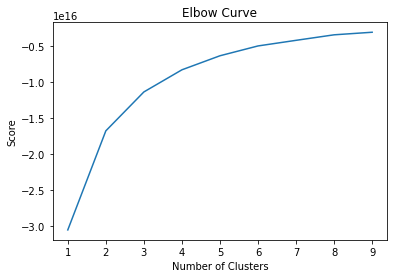

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Choosing 3 clusters based on this Elbow Curve (drops less signifcantly after this amount of clusters)

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_3)

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [19]:
df_3['clusters'] = kmeans.fit_predict(df_3)

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [20]:
df_3.head()

,AveragePrice,Index,SalesVolume,DetachedPrice,DetachedIndex,SemiDetachedPrice,SemiDetachedIndex,TerracedPrice,TerracedIndex,FlatPrice,...,FOOPrice,FOOIndex,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex,OldSalesVolume,Official Interest Rate,clusters
Date,,,,,,,,,,,,,,,,,,,,,
1/1/1995,54516.42545,21.836620,79.0,85482.01252,22.699081,59598.67451,21.526612,48955.96381,20.454703,38126.03274,...,0.0,0.0,59255.49943,22.378461,11.0,54372.37389,21.788639,68.0,6.13,0
1/1/1995,44464.03724,32.815689,70.0,67547.91981,34.139554,42776.09928,32.499311,35513.54992,31.944308,32808.34708,...,0.0,0.0,60041.84226,33.876423,9.0,43138.66035,32.908903,61.0,6.13,0
1/1/1995,45424.80814,31.551992,114.0,66983.19796,32.574116,40407.89905,31.274357,33439.34928,30.722479,30527.41852,...,0.0,0.0,63207.94539,31.262341,16.0,44721.87801,31.570205,98.0,6.13,0
1/1/1995,59473.60257,25.259505,222.0,95785.74537,25.677194,59760.25847,24.785972,47531.81490,23.787813,39097.34709,...,0.0,0.0,67718.47861,24.467387,21.0,58827.71158,25.301688,201.0,6.13,0
1/1/1995,38911.87777,33.500470,97.0,56968.65464,35.040323,35332.04192,33.051218,28723.84563,32.349616,25217.73531,...,0.0,0.0,48136.98634,32.748969,23.0,38664.77907,34.044514,74.0,6.13,0


In [21]:
df_3['clusters'].value_counts()

0    102573
1     26780
2      1549
Name: clusters, dtype: int64

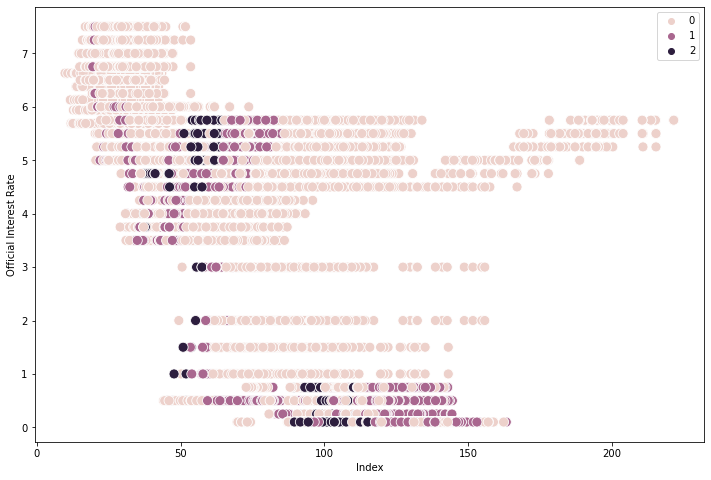

In [22]:
# Plot the clusters for the "Index" and "Official Interest Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Index'], y=df_3['Official Interest Rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Index') # Label x-axis.
plt.ylabel('Official Interest Rate') # Label y-axis.
plt.show()

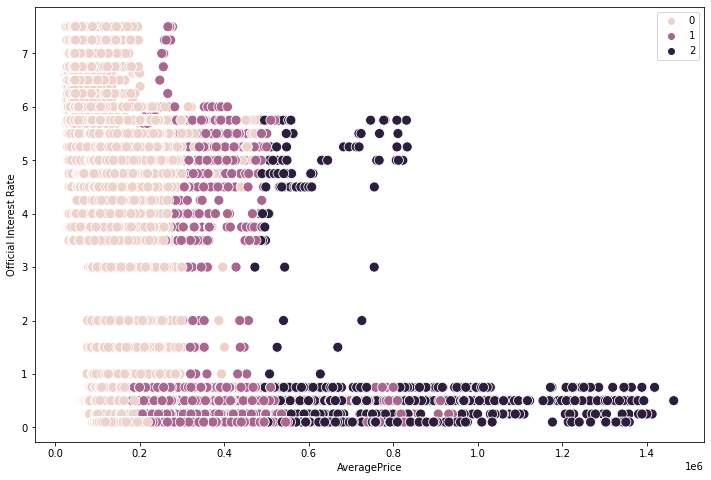

In [23]:
# Plot the clusters for the "AveragePrice" and "Official Interest Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['AveragePrice'], y=df_3['Official Interest Rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('AveragePrice') # Label x-axis.
plt.ylabel('Official Interest Rate') # Label y-axis.
plt.show()

Hard to tell with the different clusters if there is much of a relationship between these variables, overall trend seems to be that as interest rates decrease, the average house price index (Index) or detached house price index (DetachedIndex) increases. These cluster don't appear to be generating any new insights into the data at present.

In [24]:
df_3.loc[df_3['clusters'] == 2, 'cluster'] = 'dark purple'
df_3.loc[df_3['clusters'] == 1, 'cluster'] = 'purple'
df_3.loc[df_3['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df_3.groupby('clusters').agg({'Official Interest Rate':['mean', 'median'], 
                         'Index':['mean', 'median'], 
                          'AveragePrice':['mean', 'median']})

Official Interest Rate              Index               AveragePrice  \
                           mean median        mean      median           mean   
clusters                                                                        
0                      3.527293    4.5   73.468224   81.510131  127806.027260   
1                      0.677289    0.5  108.229335  114.148617  287515.180317   
2                      0.712847    0.5  100.762315  106.664928  673836.321666   

                       
               median  
clusters               
0         127566.9764  
1         270532.4633  
2         594658.0212

Can see there is a clear relationship between interest rate and house price and house price index. Clusters 0 has a mean official interest rate of 3.5272 and mean Index is 73.4682 and median is 81.510. Whilst the mean Average House price is 127806.027 and the median average house price is 127566.976. The house price index has a value of 100 in 2015 so we can see that lower interest rates does increase the value of house prices.

Looking at cluster 1, we can see that the median interest rate is 0.5 and the median Index is 108.22 and AveragePrice median is 270532.4633. This would confirm that as interest rates are at lower levels, this positively impacts average house price and the average house price index.